In [78]:
import os
import requests
from bs4 import BeautifulSoup
import textwrap
import pandas as pd
import lxml  
import time
from IPython.display import clear_output
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from time import sleep
import re
from tqdm import tqdm
from functools import reduce

In [79]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

In [80]:
def print_whole_df(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df)

In [81]:
train

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing,price
376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,45.0,100.0,False,False,True,False,False,True,False,79999.0
377,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,45.0,100.0,False,True,True,False,False,False,True,79999.0
573,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,100.0,False,False,False,False,False,True,False,112999.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,45.0,100.0,False,False,False,False,False,True,False,95999.0
508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,45.0,100.0,True,False,False,False,False,True,False,95999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,62.0,True,False,True,False,False,False,False,76999.0
602,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,99.0,False,True,True,False,False,True,False,129999.0
603,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,99.0,False,True,True,False,False,True,False,129999.0
604,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,85.0,False,False,False,False,False,True,False,129999.0


In [82]:
test

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing,price
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,72.0,0.0,False,False,False,False,False,False,True,174799.0
708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,True,False,False,False,True,True,231999.0
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,True,False,False,False,False,True,True,211599.0
640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,False,True,False,False,True,True,149999.0
678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,94.0,False,True,False,False,False,True,False,183999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,62.0,True,False,True,False,False,False,False,78999.0
89,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,False,False,False,False,False,False,True,41999.0
522,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,False,False,False,False,False,True,False,99999.0
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,46.0,65.0,False,False,False,False,False,False,False,70999.0


In [83]:
X_train, y_train = train.drop(['price', 'release_year'], axis = 1), train.price
X_test, y_test = test.drop(['price', 'release_year'], axis = 1), test.price

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8750809291883107

In [86]:
reg.score(X_train, y_train)

0.9857932082493981

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
reg = KNeighborsRegressor(n_neighbors = 3, weights = 'distance', n_jobs = -1, p = 1).fit(X_train, y_train)
reg.score(X_test, y_test)

0.6999164858650171

In [12]:
y_train.describe()

count       375.000000
mean      88950.733333
std       49412.308253
min       29999.000000
25%       54999.000000
50%       77999.000000
75%       99999.000000
max      287999.000000
Name: price, dtype: float64

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

scaled = min_max_scaler.fit_transform(X_train.values)
nX_train = pd.DataFrame(scaled).set_index(X_train.index)
nX_train.columns = X_train.columns

scaled = min_max_scaler.fit_transform(X_test.values)
nX_test = pd.DataFrame(scaled).set_index(X_test.index)
nX_test.columns = X_test.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002547AA8E3C8>,
      dtype=object)

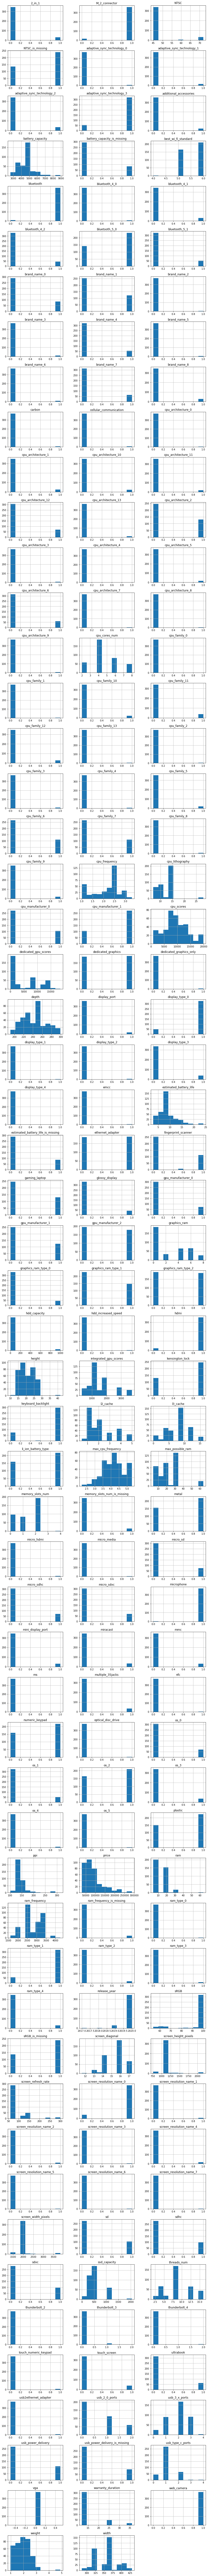

In [222]:
train.astype(float).hist(figsize = (15, 200), layout = (-1, 3))

In [282]:
X_train.drop(X_train.columns[112], axis = 1)

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,integrated_gpu_scores,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing
570,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1163.0,45.0,58.0,False,True,False,False,False,True,False
120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,366.0,45.0,100.0,False,False,False,False,False,True,True
121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1920.0,45.0,100.0,False,False,False,False,False,True,True
176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1920.0,45.0,100.0,True,False,True,True,False,False,True
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1163.0,45.0,100.0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1578.0,45.0,100.0,False,False,False,False,False,True,True
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,339.0,45.0,100.0,False,False,False,False,False,True,True
215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1255.0,45.0,100.0,False,True,False,False,False,True,True
527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2918.0,45.0,100.0,False,True,True,True,False,True,False


In [306]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize = True)

pt.fit(X_train)

tX_train = pd.DataFrame(pt.transform(X_train)).set_index(X_train.index)
tX_train.columns = X_train.columns

tX_test = pd.DataFrame(pt.transform(X_test)).set_index(X_test.index)
tX_test.columns = X_test.columns

print(pt.lambdas_) 

C:\Users\Yuriy\.conda\envs\New\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Yuriy\.conda\envs\New\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\Yuriy\.conda\envs\New\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[-5.92813997e+00 -3.33337840e+00 -2.70505320e+02 -6.01122941e+01
 -9.75970704e+00 -1.08202126e+02 -6.76263319e+01 -8.59086538e+00
 -1.93214136e+01 -1.35252664e+02 -3.60673755e+01 -1.54537573e+01
  9.94873486e+00  1.14787629e+01 -2.70505320e+02 -1.35252664e+02
 -1.38631218e+01 -2.70505312e+02 -5.41010667e+02  9.75970743e+00
 -3.18241556e+01 -6.76263323e+01 -1.86549554e+01 -1.25635398e+01
 -1.92449293e+00 -1.15427920e-01 -4.35230157e+00  4.35230163e+00
 -7.15076999e+00 -3.21604486e+00 -3.92897954e-01 -7.63037889e+00
 -1.05564752e+01  1.04783877e+00 -1.50233743e+01 -7.72872324e+01
 -2.70505320e+02  1.46160101e+01 -9.01684403e+01 -4.91827850e+01
 -2.70505312e+02 -3.60673755e+01 -5.41010630e+02 -5.41010648e+02
 -5.41010648e+02 -2.70505320e+02 -2.70505320e+02 -1.80336884e+02
 -7.72872346e+01 -1.35252664e+02 -2.70505288e+01 -4.01650337e+00
 -4.01650331e+00 -1.08202129e+02 -2.57624037e+01 -2.57624030e+01
 -1.46160099e+01 -1.86549552e+01 -1.35252664e+02 -2.70505304e+02
 -2.08079378e+01 -2.81906

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254032E3828>,
      dtype=object)

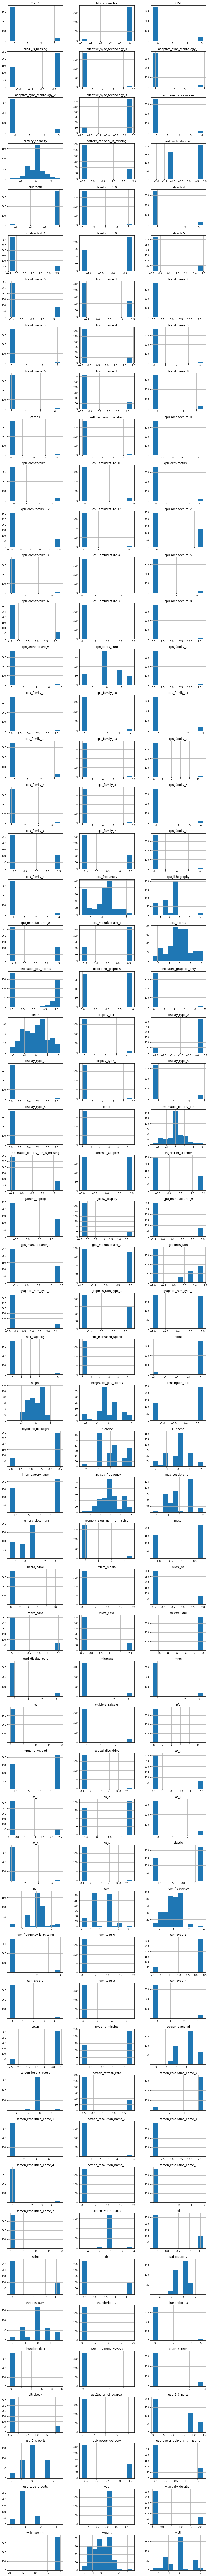

In [299]:
tX.astype(float).hist(figsize = (15, 200), layout = (-1, 3))

In [307]:
pd.DataFrame(tX_test)

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,integrated_gpu_scores,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing
164,-0.541390,-0.690201,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,2.246862,-0.284063,-0.103835,...,-0.233827,-0.31738,0.428220,-0.529021,-0.561951,-0.545507,-0.249646,-0.278543,-1.325652,0.754346
448,-0.541390,-0.690201,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,2.246862,-0.284063,-0.103835,...,0.523025,-0.31738,0.428220,-0.529021,1.779513,-0.545507,-0.249646,-0.278543,0.754346,-1.325652
182,-0.541390,1.448852,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,-0.445065,-0.284063,-0.103835,...,-0.764775,-0.31738,0.428220,-0.529021,-0.561951,-0.545507,-0.249646,-0.278543,0.754346,0.754346
676,-0.541390,1.448852,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,-0.445065,-0.284063,-0.103835,...,-0.368029,-0.31738,0.428220,1.890283,1.779513,-0.545507,-0.249646,3.590110,0.754346,-1.325652
217,1.847096,-0.690201,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,-0.445065,-0.284063,-0.103835,...,-0.233827,-0.31738,0.428220,1.890283,1.779513,1.833157,-0.249646,-0.278543,-1.325652,0.754346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.541390,-0.690201,-0.073225,-0.156813,2.412091,-0.116248,-0.147643,-0.445065,-0.284063,-0.103835,...,-2.108525,-0.31738,0.428220,-0.529021,-0.561951,1.833157,-0.249646,-0.278543,-1.325652,0.754346
84,1.847096,-0.690201,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,-0.445065,-0.284063,-0.103835,...,0.566912,-0.31738,0.428220,1.890283,-0.561951,1.833157,4.005678,-0.278543,-1.325652,0.754346
184,-0.541390,1.448852,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,-0.445065,-0.284063,-0.103835,...,0.566912,-0.31738,-2.472674,-0.529021,-0.561951,-0.545507,-0.249646,-0.278543,0.754346,-1.325652
535,1.847096,-0.690201,-0.073225,-0.156813,-0.414578,-0.116248,-0.147643,-0.445065,-0.284063,-0.103835,...,0.186392,-0.31738,-2.466051,1.890283,-0.561951,1.833157,-0.249646,-0.278543,-1.325652,-1.325652


In [165]:
ny_train

570    0.313953
120    0.058140
121    0.058140
176    0.089147
237    0.120155
         ...   
166    0.085271
27     0.019380
215    0.113953
527    0.271318
591    0.348837
Length: 375, dtype: float64

In [166]:
ny_test.describe()

count    219.000000
mean       0.249722
std        0.182615
min        0.000000
25%        0.109434
50%        0.207547
75%        0.322642
max        1.000000
dtype: float64

In [167]:
X = pd.concat([y_train, y_train], axis = 1)

In [168]:
X_std = ((X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)))
X_std

,price,price
570,0.313953,0.313953
120,0.058140,0.058140
121,0.058140,0.058140
176,0.089147,0.089147
237,0.120155,0.120155
...,...,...
166,0.085271,0.085271
27,0.019380,0.019380
215,0.113953,0.113953
527,0.271318,0.271318


In [169]:
(X_std * (2 - 1) + 1).describe()

,price,price
count,375.000000,375.000000
mean,1.228495,1.228495
std,0.191521,0.191521
min,1.000000,1.000000
25%,1.096899,1.096899
50%,1.186047,1.186047
75%,1.271318,1.271318
max,2.000000,2.000000


In [170]:
y_test

164     51999.0
448     87999.0
182     52999.0
676    180999.0
217     59999.0
         ...   
88      41999.0
84      40999.0
184     53999.0
535     99999.0
141     48999.0
Name: price, Length: 219, dtype: float64

In [171]:
ny_test

164    0.101887
448    0.237736
182    0.105660
676    0.588679
217    0.132075
         ...   
88     0.064151
84     0.060377
184    0.109434
535    0.283019
141    0.090566
Length: 219, dtype: float64

In [172]:
ny_train

570    0.313953
120    0.058140
121    0.058140
176    0.089147
237    0.120155
         ...   
166    0.085271
27     0.019380
215    0.113953
527    0.271318
591    0.348837
Length: 375, dtype: float64

In [173]:
nX_train

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,integrated_gpu_scores,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing
570,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250073,0.0,0.086957,0.0,1.0,0.0,0.0,0.0,1.0,0.0
120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017236,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.471224,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.471224,0.0,1.000000,1.0,0.0,1.0,1.0,0.0,0.0,1.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.250073,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.371312,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.009349,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276950,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0
527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.762781,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [174]:
nX_test

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,integrated_gpu_scores,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.068290,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.113168,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
182,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044158,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061663,0.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0
217,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068290,0.0,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.004250,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.116194,0.0,1.000000,1.0,0.0,1.0,1.0,0.0,0.0,1.0
184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.116194,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.091557,0.0,0.282609,1.0,0.0,1.0,0.0,0.0,0.0,0.0


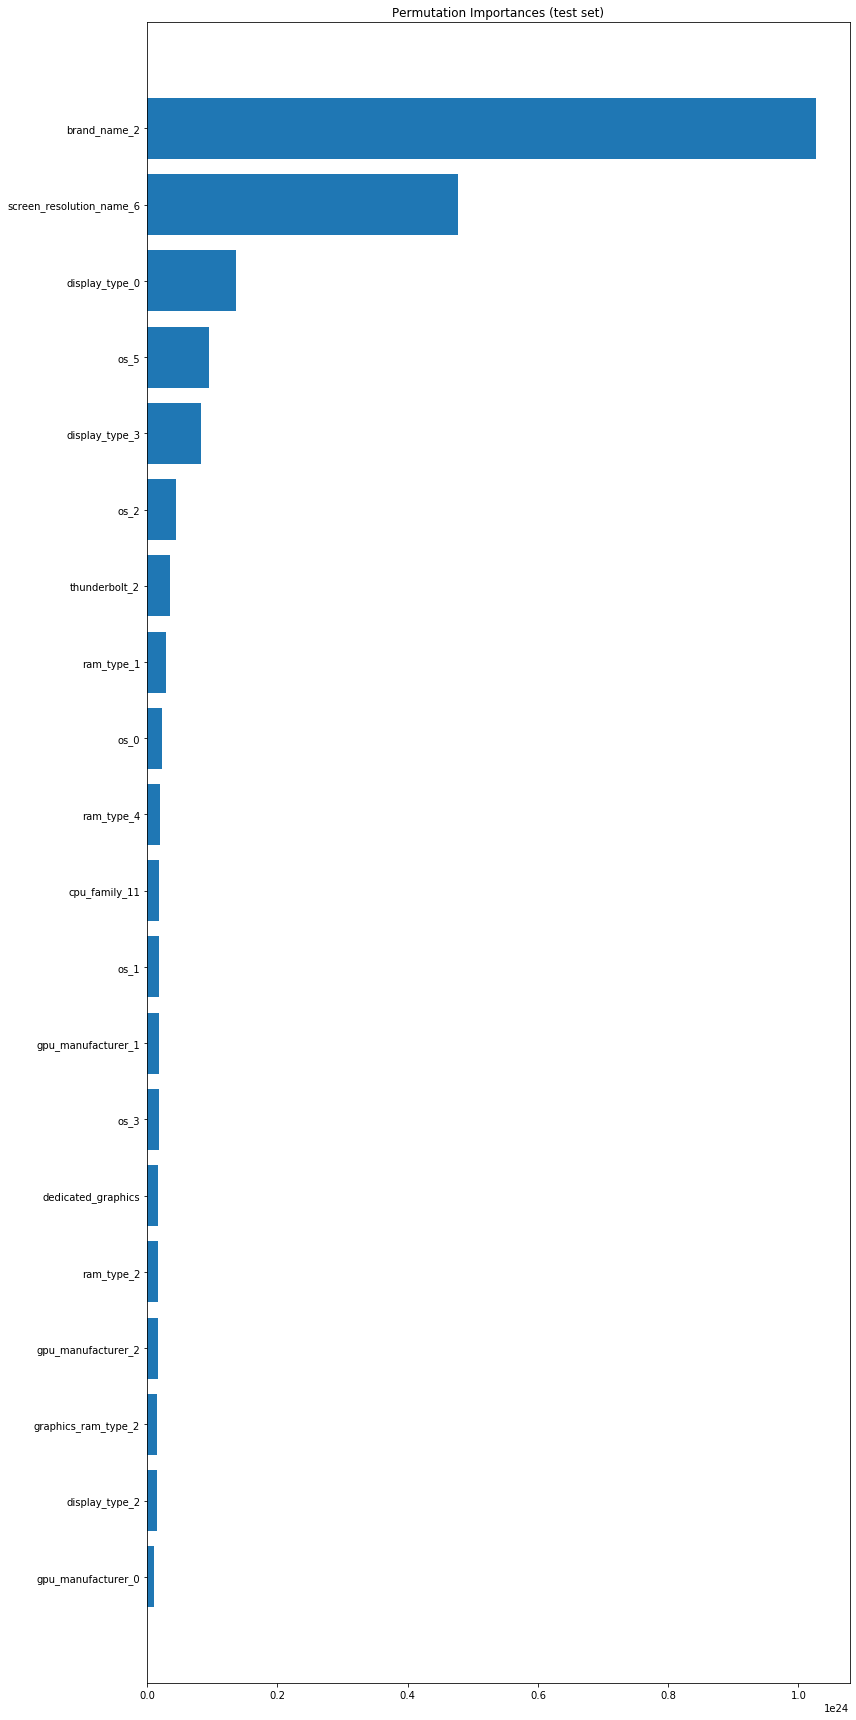

In [21]:
from sklearn.inspection import permutation_importance

def get_permutation_importances(model, keep_first = 20):
    result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                    random_state=42, n_jobs=-1)
    
    sorted_idx = result.importances_mean.argsort()
    
    y_ticks = np.arange(0, keep_first)
    fig, ax = plt.subplots(figsize = (12, 24))
    ax.barh(y_ticks, result.importances_mean[sorted_idx][-keep_first:])
    ax.set_yticklabels(X_test.columns[sorted_idx][-keep_first:])
    ax.set_yticks(y_ticks)
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()

get_permutation_importances(reg)

In [22]:
def graphics_ram_binning(val):
    if val < 2:
        return 0
    elif val < 4:
        return 1
    elif val < 6:
        return 2
    elif val < 8:
        return 3
    else:
        return 4

In [23]:
X_train.graphics_ram.map(graphics_ram_binning).value_counts()

0    185
3     66
2     65
1     33
4     26
Name: graphics_ram, dtype: int64

In [25]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize = True)

tX_train, tX_test = X_train.copy(), X_test.copy()

tX_train['graphics_ram'] = X_train.graphics_ram.map(graphics_ram_binning)
tX_test['graphics_ram'] = X_test.graphics_ram.map(graphics_ram_binning)

# pt = PowerTransformer()

tX_train[['screen_height_pixels', 'screen_width_pixels', 'width', 'screen_diagonal']] = \
                    pt.fit_transform(X_train[['screen_height_pixels', 'screen_width_pixels', 'width', 'screen_diagonal']])
tX_test[['screen_height_pixels', 'screen_width_pixels', 'width', 'screen_diagonal']] = \
                    pt.transform(X_test[['screen_height_pixels', 'screen_width_pixels', 'width', 'screen_diagonal']])

# tX_train = pt.fit_transform(X_train)
# tX_test = pt.transform(X_test)

In [20]:
reg = linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, 
                         copy_X=True, max_iter=None, tol=0.001, solver='auto', 
                         random_state=None).fit(X_train, y_train)
reg.score(X_test, y_test)

NameError: name 'ty_train' is not defined

In [26]:
reg = linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=True, 
                         copy_X=True, max_iter=None, tol=0.001, solver='auto', 
                         random_state=None).fit(tX_train, y_train)
reg.score(tX_test, y_test)

0.9173984646334674

In [71]:
reg = linear_model.Ridge(alpha=0.3, fit_intercept=True, normalize=True, 
                         copy_X=True, max_iter=None, tol=0.001, solver='auto', 
                         random_state=None).fit(X_train, y_train)
reg.score(X_test, y_test)

0.9270942418196089

In [74]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, reg.predict(X_test)), mean_squared_error(y_test, reg.predict(X_test)) ** 0.5,\
            r2_score(y_test, reg.predict(X_test))

(8937.93175792655, 13036.73262720624, 0.9270942418196089)

In [68]:
reg = linear_model.Ridge(alpha=0.3, fit_intercept=True, normalize=True, 
                         copy_X=True, max_iter=10000, tol=0.001, solver='auto', 
                         random_state=None).fit(tX_train, y_train)
reg.score(tX_test, y_test)

0.9279557656383727

In [30]:
# reg = linear_model.Lasso(alpha=1.2, fit_intercept=True, normalize=True, 
#                          precompute=False, copy_X=True, max_iter=100000, tol=0.0001,
#                          warm_start=False, positive=False, random_state=None, 
#                          selection='cyclic').fit(tX_train, y_train)
# reg.score(tX_test, y_test)

In [31]:
# reg = linear_model.ElasticNet(alpha=0.002, l1_ratio=0.1, fit_intercept=True,
#                         normalize=True, precompute=False, max_iter=1000, 
#                         copy_X=True, tol=0.0001, warm_start=False, positive=False,
#                         random_state=None, selection='cyclic').fit(tX_train, y_train)
# reg.score(tX_test, y_test)

In [33]:
from sklearn import svm

reg = svm.SVR(kernel='rbf', degree=3, gamma='scale', 
                coef0=0.0, tol=0.001, C=100000000, epsilon=0.1, 
                shrinking=True, cache_size=200, verbose=False, 
                max_iter=- 1).fit(tX_train, y_train)
reg.score(tX_test, y_test)

0.6940237288773115

In [66]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error


lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
#     'num_leaves': 31,
    'learning_rate': 0.2,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

Starting training...
[1]	valid_0's l2: 1.76695e+09	valid_0's l1: 30903.5
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 1.39809e+09	valid_0's l1: 26896.9
[3]	valid_0's l2: 1.12998e+09	valid_0's l1: 23756.6
[4]	valid_0's l2: 9.59516e+08	valid_0's l1: 21667.9
[5]	valid_0's l2: 8.404e+08	valid_0's l1: 19743.9
[6]	valid_0's l2: 7.75273e+08	valid_0's l1: 18556.5
[7]	valid_0's l2: 6.47293e+08	valid_0's l1: 16667.4
[8]	valid_0's l2: 6.22309e+08	valid_0's l1: 16069
[9]	valid_0's l2: 5.51846e+08	valid_0's l1: 14903.8
[10]	valid_0's l2: 5.2023e+08	valid_0's l1: 14111.4
[11]	valid_0's l2: 5.08696e+08	valid_0's l1: 13589.7
[12]	valid_0's l2: 4.91585e+08	valid_0's l1: 13197.9
[13]	valid_0's l2: 4.91978e+08	valid_0's l1: 13085.5
[14]	valid_0's l2: 4.63825e+08	valid_0's l1: 12649.9
[15]	valid_0's l2: 4.46906e+08	valid_0's l1: 12232.8
[16]	valid_0's l2: 4.24532e+08	valid_0's l1: 11969.5
[17]	valid_0's l2: 4.07401e+08	valid_0's l1: 11662.2
[18]	valid_0's l2: 3.93694e+08	v

In [67]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8960177217003155

In [409]:
r2_score(reg.predict(X_test), y_test.map(np.log))

0.950051920501682

In [415]:
r2_score(pd.Series(reg.predict(X_test)).map(np.exp), y_test)

0.8997699892455016

In [407]:
y_test.map(np.log).map(np.exp)

164     51999.0
448     87999.0
182     52999.0
676    180999.0
217     59999.0
         ...   
88      41999.0
84      40999.0
184     53999.0
535     99999.0
141     48999.0
Name: price, Length: 219, dtype: float64

In [398]:
from sklearn.metrics import r2_score

r2_score(reg.predict(X_test), ty_test)

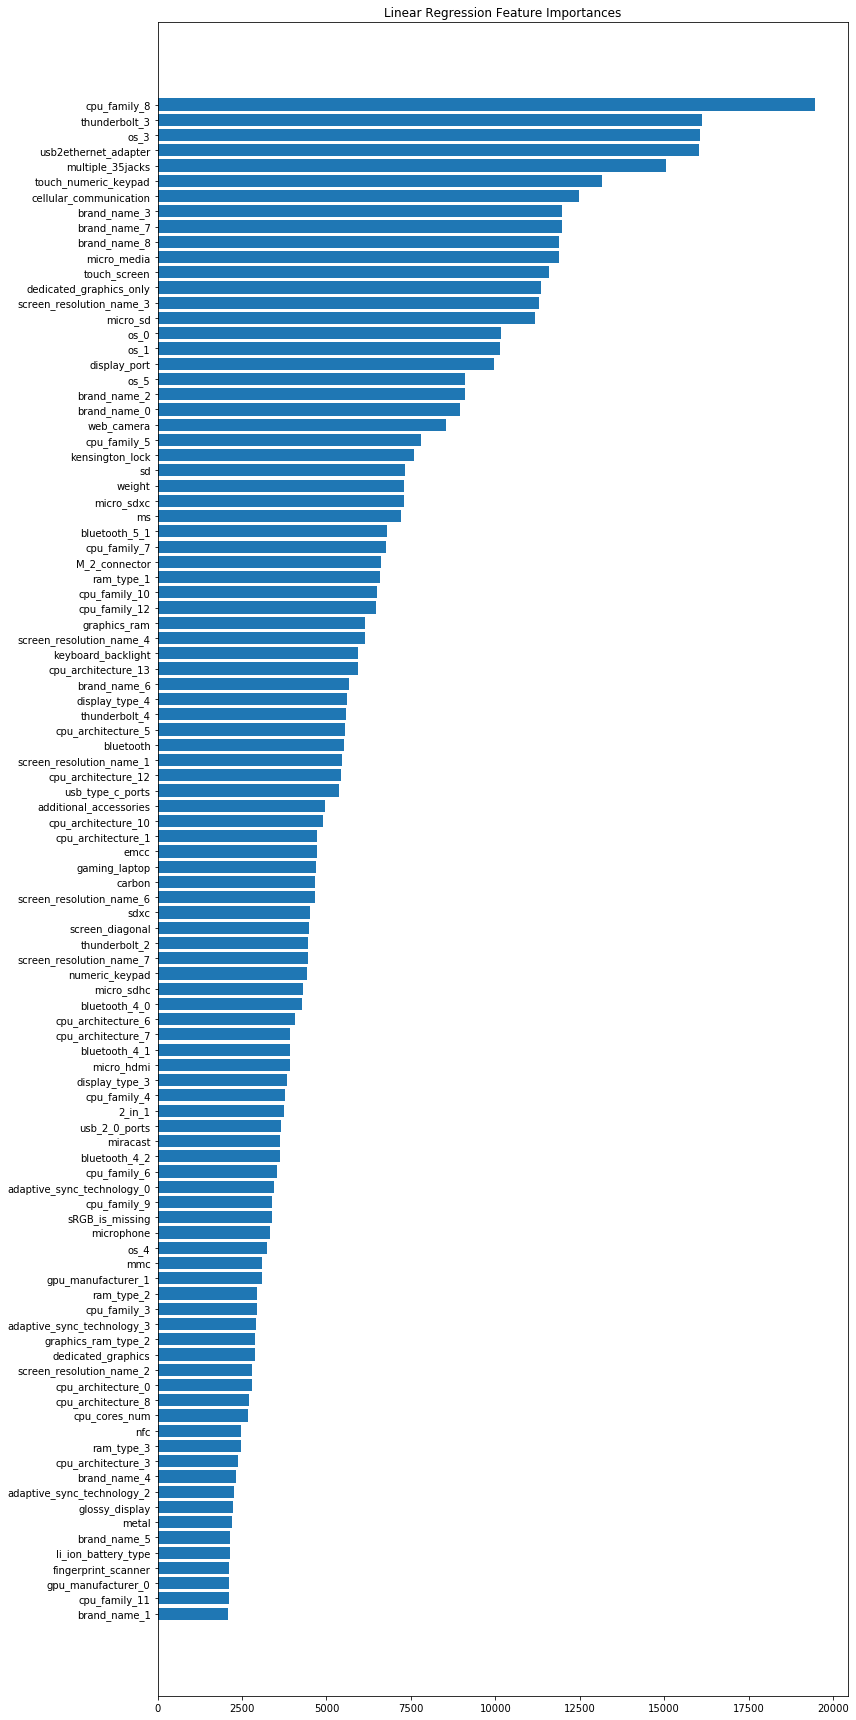

In [430]:
def get_lr_feature_importances(reg, keep_first = 100):
    lr_importances = np.abs(reg.coef_)

    sorted_idx = lr_importances.argsort()

    y_ticks = np.arange(0, keep_first)
    fig, ax = plt.subplots(figsize = (12, 24))
    ax.barh(y_ticks, lr_importances[sorted_idx][-keep_first:])
    ax.set_yticklabels(X_test.columns[sorted_idx][-keep_first:])
    ax.set_yticks(y_ticks)
    ax.set_title("Linear Regression Feature Importances")
    fig.tight_layout()
    plt.show()
    
get_lr_feature_importances(reg)

In [211]:
def get_feature_importances(random_forest_model, keep_first = 15):
    tree_feature_importances = random_forest_model.feature_importances_
    
    sorted_idx = tree_feature_importances.argsort()

    y_ticks = np.arange(0, keep_first)
    fig, ax = plt.subplots(figsize = (12, 24))
    ax.barh(y_ticks, tree_feature_importances[sorted_idx][-keep_first:])
    ax.set_yticklabels(X_test.columns[sorted_idx][-keep_first:])
    ax.set_yticks(y_ticks)
    ax.set_title("Random Forest Feature Importances (MDI)")
    fig.tight_layout()
    plt.show()
    
get_feature_importances(reg)

AttributeError: 'Ridge' object has no attribute 'feature_importances_'

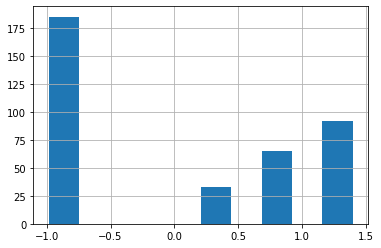

In [426]:
tX_train.graphics_ram.hist()

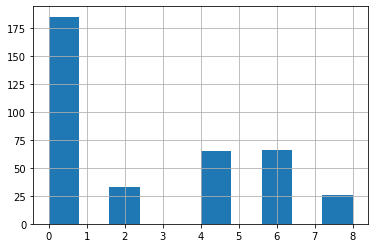

In [425]:
X_train.graphics_ram.hist()

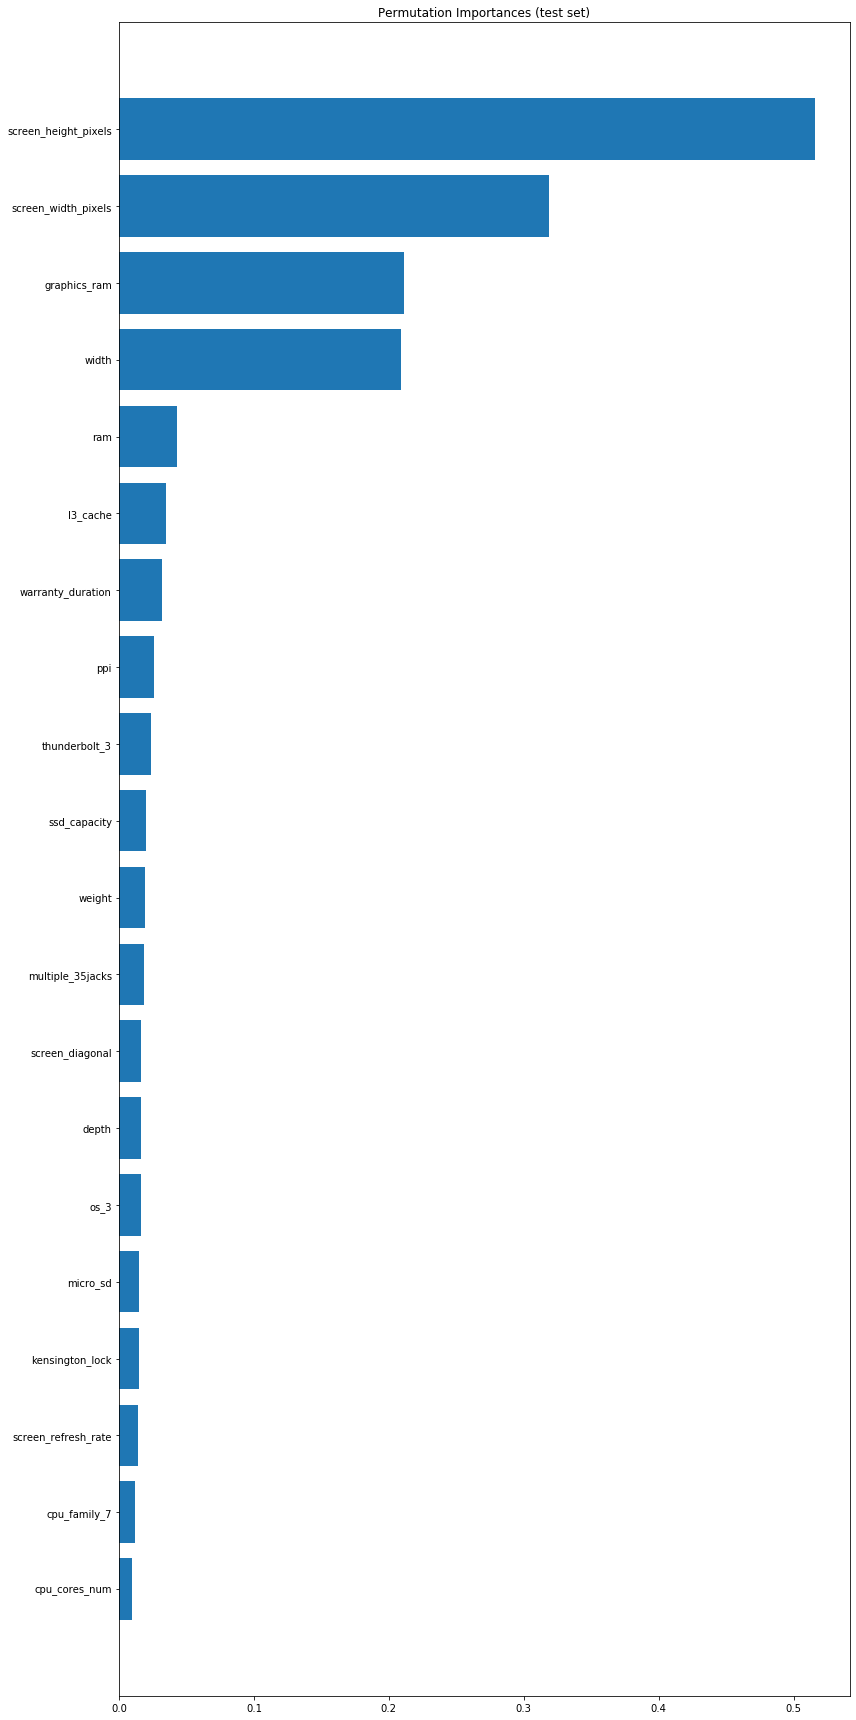

In [419]:
from sklearn.inspection import permutation_importance

def get_permutation_importances(model, keep_first = 20):
    result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                    random_state=42, n_jobs=-1)
    
    sorted_idx = result.importances_mean.argsort()
    
    y_ticks = np.arange(0, keep_first)
    fig, ax = plt.subplots(figsize = (12, 24))
    ax.barh(y_ticks, result.importances_mean[sorted_idx][-keep_first:])
    ax.set_yticklabels(X_test.columns[sorted_idx][-keep_first:])
    ax.set_yticks(y_ticks)
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()

#     fig, ax = plt.subplots(figsize = (15, 20))
#     ax.boxplot(result.importances[sorted_idx].T,
#                vert=False, labels=X_test.columns[sorted_idx])
#     ax.set_title("Permutation Importances (test set)")
#     fig.tight_layout()
#     plt.show()
    
get_permutation_importances(reg)

In [366]:
preds = pt.inverse_transform(reg.predict(X_test).reshape(-1, 1)).reshape(-1,)

res = pd.concat([pd.Series(preds, index = y_test.index, name = 'Predict'), \
                 pd.Series(y_test, name = "Price")], axis = 1).sort_index()
print_whole_df(res.head(20))

         Predict    Price
0   27490.148172  24999.0
4   28560.027070  28999.0
13  33149.600140  32999.0
14  35474.336501  32999.0
21  39535.871962  34999.0
25  34630.352974  34999.0
29  38680.458829  34999.0
31  42557.276229  35999.0
49  35649.212151  36999.0
53  39821.974720  37999.0
57  38529.463873  37999.0
58  37960.436224  37999.0
61  38133.359936  38499.0
62  36003.267755  38999.0
63  40283.579677  38999.0
68  40845.501335  39999.0
72  41966.089885  39999.0
74  40557.832369  39999.0
77  40350.732769  39999.0
81  40845.741296  39999.0


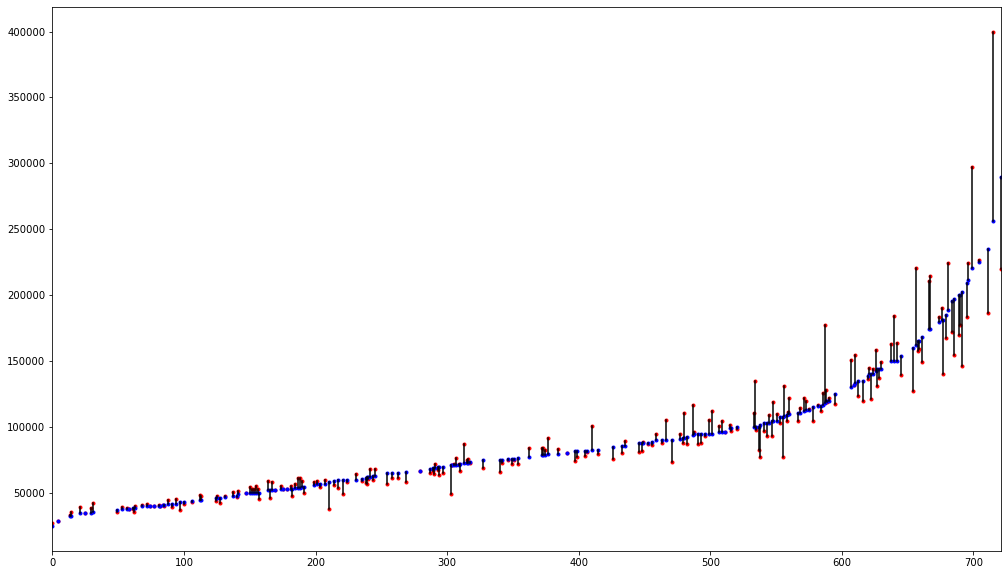

In [367]:
plt.figure(figsize = (17, 10))
res.Predict.plot(style = 'r.')
res.Price.plot(style = 'b.')
for i in range(len(res.index)):
    plt.plot(np.repeat(res.index[i], 2), res.values[i], 'k')

In [369]:
preds = pt.inverse_transform(reg.predict(X_train).reshape(-1, 1)).reshape(-1,)

res = pd.concat([pd.Series(preds, index = y_train.index, name = 'Predict'), \
                 pd.Series(y_train, name = "Price")], axis = 1).sort_index()
print_whole_df(res.head(20))

         Predict    Price
5   30345.764367  29999.0
6   30567.344936  29999.0
7   32495.461710  29999.0
8   33205.506810  31999.0
9   37477.264798  32999.0
10  33691.659244  32999.0
11  34488.216011  32999.0
12  33229.753314  32999.0
15  35924.940851  33999.0
16  32695.877708  33999.0
17  36732.017768  33999.0
18  36732.017768  33999.0
19  36598.782139  33999.0
20  35570.852278  33999.0
22  34907.978841  34999.0
23  36405.201398  34999.0
24  36405.201398  34999.0
27  34436.214981  34999.0
28  35962.862584  34999.0
33  36296.615612  35999.0


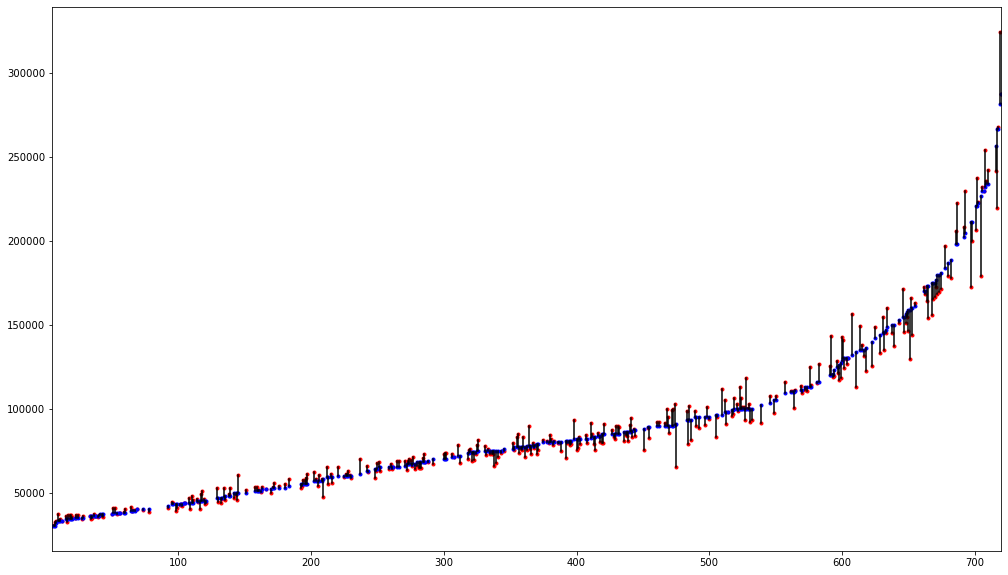

In [370]:
plt.figure(figsize = (17, 10))
res.Predict.plot(style = 'r.')
res.Price.plot(style = 'b.')
for i in range(len(res.index)):
    plt.plot(np.repeat(res.index[i], 2), res.values[i], 'k')